In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

In [19]:
driver = webdriver.Chrome()


In [4]:
# url = "https://www.zomato.com/bangalore"

In [5]:
# driver.get(url)
# time.sleep(2)

In [6]:
# for k in range(20):
#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#         time.sleep(2)

In [7]:
#len(driver.find_elements(By.CLASS_NAME, "jumbo-tracker"))

501

In [8]:
soup = BeautifulSoup(driver.page_source)

<html data-rh="lang" lang="en-in"><head>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://jumbo.zomato.com" rel="preconnect"/>
<link href="https://accounts.google.com" rel="preconnect"/>
<link href="https://securepubads.g.doubleclick.net" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://www.googleadservices.com" rel="preconnect"/>
<link href="https://bat.bing.com" rel="preconnect"/>
<link href="https://8391443.fls.doubleclick.net" rel="preconnect"/>
<title>Checkout Best Food Places To Eat In Bengaluru | Zomato</title>
<meta charset="utf-8" data-rh="true"/><meta content="NOODP,NOYDIR" data-rh="true" name="robots"/><meta content="Looking for Best Food in Bengaluru? Checkout the highest-rated restaurants in Bengaluru and satisfy your food cravings now!" data-rh="true" name="description"/><meta content="summary" data-rh="true" n
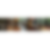
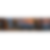
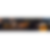
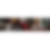
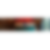
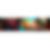
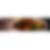
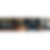
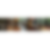
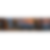
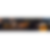
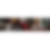
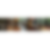
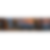
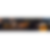
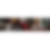
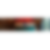
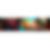
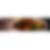
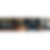
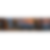
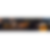
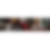
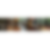

In [9]:
soup


In [53]:
def scrape_zomato(city):
    url = f"https://www.zomato.com/{city}"
    driver.get(url)
    driver.maximize_window()
    for k in range(1):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
    soup = BeautifulSoup(driver.page_source)
    restaurants = soup.find_all('div',{"class":"sc-dzOgQY fnDzyq"})
    restaurant_data = {'Restaurant': [], 'Rating': [], 'Restaurant_Type': [],'Price': [],  'Location': [], 'Link': []}
    for res in restaurants:
        try:
            restaurant_data['Restaurant'].append(res.find('h4',class_="sc-1hp8d8a-0 sc-iEPtyo fKawif").text)
        except:
            restaurant_data['Restaurant'].append("NA")
        try:
            rrestaurant_data['Rating'].append(res.find('div',class_="sc-1q7bklc-5 kHxpSk").text)
        except:
            restaurant_data['Rating'].append("NA")
        try:
            restaurant_data['Restaurant_Type'].append(res.find('p',class_="sc-1hez2tp-0 sc-gUlUPW gQHQnh").text)
        except:
            restaurant_data['Restaurant_Type'].append("NA")
        try:
            restaurant_data['Price'].append(res.find('p',class_="sc-1hez2tp-0 sc-gUlUPW iMvhva").text)
        except:
            restaurant_data['Price'].append("NA")
        try:
            restaurant_data['Location'].append(res.find('p',class_="sc-1hez2tp-0 sc-kQZOhr kWLunQ").text)
        except:
            restaurant_data['Location'].append("NA")
        try:
            restaurant_data['Link'].append('https://www.zomato.com' + res.find('a', class_="sc-hZeNU cijfCJ")['href'])
        except:
            restaurant_data['Link'].append('NA')

    df = pd.DataFrame(restaurant_data)
    return df

In [54]:
hyderabad_data = scrape_zomato("bangalore")

In [55]:
hyderabad_data

,Restaurant,Rating,Restaurant_Type,Price,Location,Link
0,Muro,NA,"Thai, Cantonese","₹3,000 for two","Church Street, Bangalore",https://www.zomato.com/bangalore/muro-church-s...
1,Öz by Kebapci,NA,"Turkish, Mediterranean, Middle Eastern","₹1,800 for two","UB City, Bangalore",https://www.zomato.com/bangalore/öz-by-kebapci...
2,Hydra Club & Kitchen,NA,"Continental, Biryani, North Indian, South Indi...","₹1,200 for two","Koramangala 5th Block, Bangalore",https://www.zomato.com/bangalore/hydra-club-ki...
3,Secret Story,NA,"Continental, Asian, North Indian, Fast Food, D...","₹1,500 for two","Indiranagar, Bangalore",https://www.zomato.com/bangalore/secret-story-...
4,Over Coffee Cafe & Wine Bar,NA,"European, Italian, Continental, Cafe, Coffee","₹1,200 for two","Lavelle Road, Bangalore",https://www.zomato.com/bangalore/over-coffee-c...
5,Oney Brewhouse,NA,"American, Continental, Italian, South Indian, ...","₹1,500 for two","Cunningham Road, Bangalore",https://www.zomato.com/bangalore/oney-brewhous...
6,Babylonia - Global Food & Cocktails,NA,"Continental, North Indian, Asian, Italian, Mug...","₹1,500 for two","Koramangala 7th Block, Bangalore",https://www.zomato.com/bangalore/babylonia-glo...
7,Bramble,NA,"Continental, Asian, North Indian, Italian, Bar...","₹1,800 for two","Jayanagar, Bangalore",https://www.zomato.com/bangalore/bramble-jayan...
8,Homiga,NA,"Korean, Asian","₹1,500 for two","Forum Rex Walk, Bangalore",https://www.zomato.com/bangalore/homiga-brigad...
9,Flo,NA,"Asian, Thai, Continental, Finger Food, Sushi, ...","₹1,900 for two","Church Street, Bangalore",https://www.zomato.com/bangalore/flo-church-st...
